# **Exercise 08: *Seaborn***

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import sqlite3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import allowed entities:

In [4]:
from pandas import DataFrame
from sqlite3 import Connection

Create a dictionary for connection to the database:

In [5]:
conn_params: dict = {"db_file": "checking_logs.sqlite", "db_file_path": "../../data/", }

Make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M):

In [6]:
conn: Connection = sqlite3.connect(conn_params["db_file_path"] + conn_params["db_file"], )

Check connection:

In [7]:
conn.cursor().execute("SELECT 123;", );

## Analyze only the users and not the admins.

Create a query:

In [8]:
sql_q: str = """
             SELECT
                 *
             FROM
                 checker
             WHERE
                 checker.uid LIKE 'user_%';
             """

Run a query:

In [9]:
df: DataFrame = pd.io.sql.read_sql(
    sql_q,
    conn,
    parse_dates=["timestamp", ],
)

Chech a result:

In [10]:
df.head()

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4


## Take into account only logs from the table `checker` where the `status` is `ready`:

In [11]:
df = df[(df["status"] == "ready") & (df["labname"] == "project1")]

Check updated *Pandas* dataframe:

In [12]:
df.head()

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
6,13,ready,0,2020-04-17 05:43:27.773992,4,project1,user_4
8,15,ready,1,2020-04-17 05:46:32.275104,5,project1,user_4


Create a list of useless *Pandas* dataframe columns:

In [13]:
useless_cols: list = [
    "index",
    "status",
    "success",
    "labname",
]

Drop them:

In [14]:
df.drop(columns=useless_cols, inplace=True, )

Check updated *Pandas* dataframe:

In [15]:
df.head()

,timestamp,numTrials,uid
0,2020-04-17 05:19:02.744528,1,user_4
2,2020-04-17 05:22:45.549397,2,user_4
4,2020-04-17 05:34:24.422370,3,user_4
6,2020-04-17 05:43:27.773992,4,user_4
8,2020-04-17 05:46:32.275104,5,user_4


## Choose the palette.

## The linewidth should be `3`.

## The background of the graph is `gray`.

## The height should be `10`, and the width should `1.5x` in relation to the height.

## The `fontsize=` of the title should be `30`.

## The `fontsize=` of the axises labels is `15`:

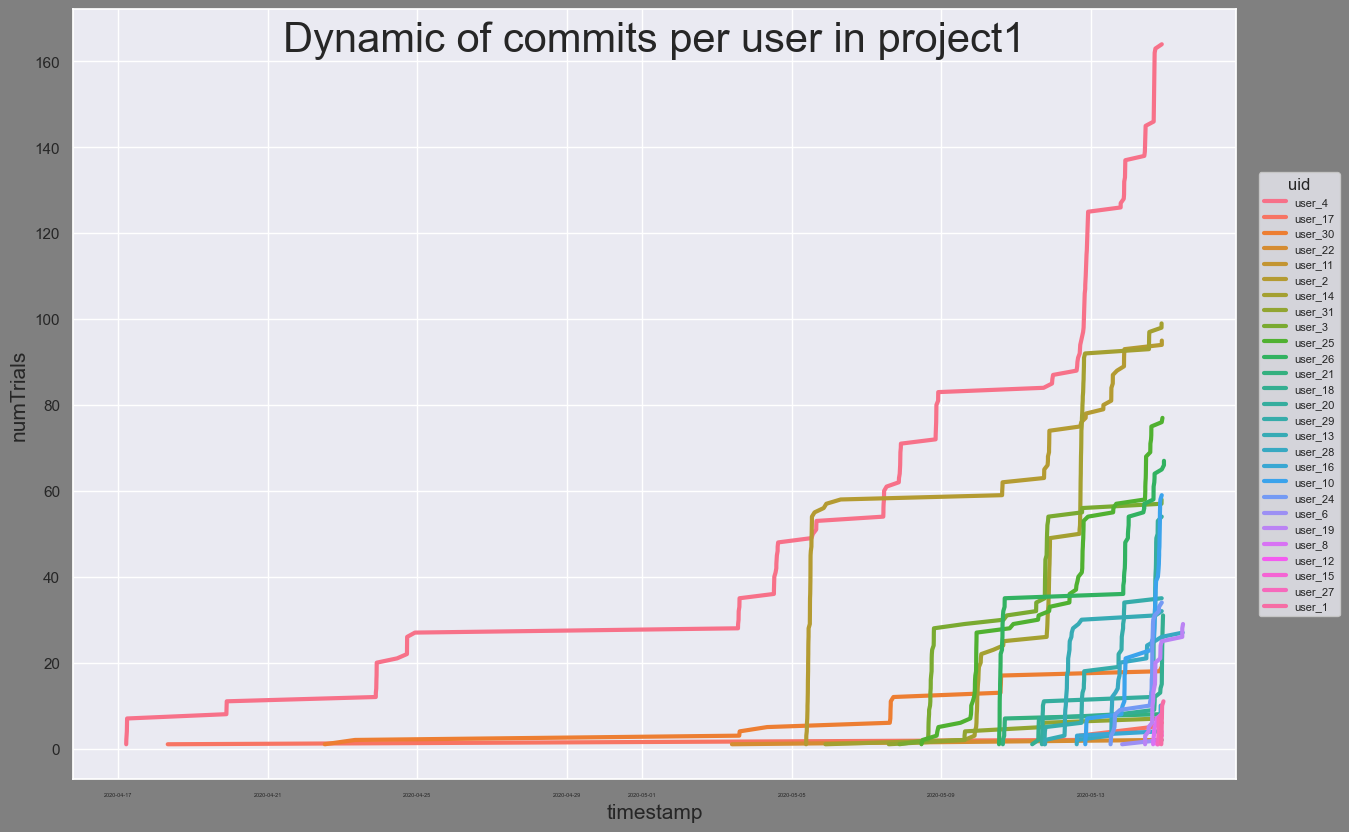

In [16]:
sns.set_theme(style="darkgrid", )
plt.figure(figsize=(15, 10, ), )
sns.lineplot(
    data=df,
    hue="uid",
    linewidth=3,
    x="timestamp",
    y="numTrials",
    palette="husl",
)
plt.title(
    "Dynamic of commits per user in project1",
    fontsize=30,
    pad=-30,
)
plt.xticks(fontsize=4, )
plt.xlabel("timestamp", fontsize=15, )
plt.ylabel("numTrials", fontsize=15, )
plt.legend(
    title="uid",
    frameon=True,
    loc="center left",
    borderaxespad=0.0,
    prop={"size": 8, },
    bbox_to_anchor=(1.02, 0.5, ),
)
plt.gcf().set_facecolor("gray", )

## At the end of *Jupyter Notebook* create a markdown cell and insert the questions:

* `"Which user was the leader in the number of commits almost all of the time?"`

The `user_4` was the leader in the number of commits almost all of the time.

* `"Which user was the leader for only a short period of time?"`

The `user_2` was the leader for only a short period of time.

Close the connection to the database:

In [17]:
conn.close()